In [1]:
%load_ext autoreload
%autoreload 2

In [6]:
%matplotlib inline
from modules.constants import *
from modules.SpatialGrid import SpatialGrid
from modules.AtomicOrbital import AtomicOrbital
import matplotlib.pyplot as plt

In [3]:
Lx = 8.0; Ly = 8.0; Lz = 8.0
Nx = 80; Ny = 80; Nz = 80
r, dV, _ = SpatialGrid.get_rgrid(Nx, Ny, Nz, Lx, Ly, Lz)
Rc = [0.0, 0.0, 0.0] #Center of the atom
Z = 4.0 #The effective charge of the atom
phi = AtomicOrbital.get_2pz(r, Rc, Z)
print('Norm of the orbital: '+str(np.sum(phi*phi)*dV)+', should be 1 in the infinite volume with fine spatial mecsh')

Norm of the orbital: 0.9999151619443735, should be 1 in the infinite volume with fine spatial mecsh


# The crystal
## The primitive cell vector
$$
\mathbf{a}_1 = a \left(\frac{\sqrt{3}}{2} \hat{x} - \frac{1}{2} \hat{y}\right), \quad
\mathbf{a}_2 = a \left(\frac{\sqrt{3}}{2} \hat{x} + \frac{1}{2} \hat{y}\right)
$$
$\mathbf{a}_1 \cdot \mathbf{a}_1 = \mathbf{a}_2 \cdot \mathbf{a}_2  = a^2, \mathbf{a}_1 \cdot \mathbf{a}_2 = \frac{a^2}{2} $

$$
\mathbf{R}_A = \frac{1}{3} (\mathbf{a}_1 + \mathbf{a}_2) 
=
\frac{a}{\sqrt{3}} \hat{x}, \quad
\mathbf{R}_B = \frac{2}{3} (\mathbf{a}_1 + \mathbf{a}_2)
=
\frac{2a}{\sqrt{3}} \hat{x}
$$

# Tight-binding wth the atomic orbitals for graphene

$$
\phi_{\mathbf{k}} (r)
 = 
c_A \Phi_{A,\mathbf{k}} (\mathbf{r}) +  c_B \Phi_{B,\mathbf{k}} (\mathbf{r}),\\
\Phi_{n,\mathbf{k}} (\mathbf{r})
=
\frac{1}{\sqrt{N_1 N_2}}
\sum_{n_1 = -N_1/2}^{N_1/2-1}\sum_{n_2 = -N_2/2}^{N_2/2-1}e^{\mathrm{i}\mathbf{k}\cdot(n_1 \mathbf{a}_1+ n_2 \mathbf{a}_2)} e^{\mathrm{i}\mathbf{k}\cdot \mathbf{R}_n} \phi_{2pz} (\mathbf{r} -\mathbf{R}_n- (n_1 \mathbf{a}_1+ n_2 \mathbf{a}_2)  ),
$$
where the two-sites in honeycomb structure are labeled as A, and B.
The $\mathbf{R}_n$ refers the relative position of $n$-atom in the PRIMITIVE CELL, summation over differnt primitive cell is acounted for $n_1, n_2$.



In [8]:
# Check of nomarlization 2pz orbital
## Generate spatial grids
a = 8.0 #So large cell
Lz = 8.0
N1 = 80
N2 = 80
Nz = 80
r, dV, V, a1, a2, b1, b2 = SpatialGrid.get_rgrid_Honeycomb(N1, N2, Nz, Lz, a=a)
## Determine atomic position and the effective charge
Rc = np.array([0.5*(np.sqrt(3.0)*a), 0.0, 0.0]) #Center of the lattice
print(Rc)
Z = 4.0
## 2pz
phi = AtomicOrbital.get_2pz(r, Rc, Z)
print('max, min = ', np.amax(np.abs(phi)), np.amin(np.abs(phi)))
print('The norm of 2pz orbital', np.sum(phi*phi)*dV, ', should be close to 1 because isolated atom in a large honeycomb cell')


[6.92820323 0.         0.        ]
max, min =  0.5870506526949595 0.0
The norm of 2pz orbital 0.9998614648412059 , should be close to 1 because isolated atom in a large honeycomb cell


In [77]:
def get_phink(r, Rc, Z, k, phiAO, N1=10, N2=10):
    #phink = (0.0+0.0j)*AtomicOrbital.get_2pz(r, Rc, Z)
    phink = (0.0+0.0j)*get_phiAO(r, Rc, Z)
    for i1 in range(-N1//2, N1//2):
        for i2 in range(-N2//2, N2//2):
            d = Rc[:2] + i1*a1 + i2*a2
            ekx = np.exp(zI*d)
            ekr = np.exp(zI*np.dot(k,d))
            d3D = 1.0*Rc
            d3D[:2] = 1.0*d
            #phink = phink + AtomicOrbital.get_2pz(r, d3D, Z)
            #phink = phink + get_phiAO(r, d3D, Z)
            phink = phink + ekr*get_phiAO(r, d3D, Z)
    phink = phink/np.sqrt(N1*N2)
    return phink, N1, N2
#
a = 4.6485 #Lattice constant for graphene
Lz = 8.0
N1 = 80
N2 = 80
Nz = 80
r, dV, V, a1, a2, b1, b2 = SpatialGrid.get_rgrid_Honeycomb(N1, N2, Nz, Lz, a=a)

Rc = np.array([0.5*(np.sqrt(3.0)*a), 0.0, 0.0]) #The body center of the cell
print(Rc)
Z = 4.0
k = np.array([0.0, 0.0]) #The Gamma point
get_phiAO = AtomicOrbital.get_2pz
phink, N1, N2 = get_phink(r, Rc, Z, k, get_phiAO)
print('The norm of phink orbital', np.sum((np.abs(phink))**2)*dV*(N1*N2))

Rc = np.array([0.0, 0.0, 0.0]) #The origin of the coordinate
print(Rc)
Z = 4.0
k = np.array([0.0, 0.0]) #The Gamma point
get_phiAO = AtomicOrbital.get_2pz
phink, N1, N2 = get_phink(r, Rc, Z, k, get_phiAO)
print('The norm of phink orbital', np.sum((np.abs(phink))**2)*dV*(N1*N2))

Rc = np.array([-0.5*(np.sqrt(3.0)*a), 0.0, 0.0]) #Outside of the cell
print(Rc)
Z = 4.0
k = np.array([0.0, 0.0]) #The Gamma point
get_phiAO = AtomicOrbital.get_2pz
phink, N1, N2 = get_phink(r, Rc, Z, k, get_phiAO)
print('The norm of phink orbital', np.sum((np.abs(phink))**2)*dV*(N1*N2))

print('When these three norms with differnt atom poisitions show the same value, the code seems written well.')

[4.02571909 0.         0.        ]
The norm of phink orbital 1.0543053843417938
[0. 0. 0.]
The norm of phink orbital 1.0543053843415422
[-4.02571909  0.          0.        ]
The norm of phink orbital 1.0543053843349006
When these three norms with differnt atom poisitions show the same value, the code seems written well.


In [78]:
#
a = 4.6485
Z = 4.0
#
Lz = 8.0
N1 = 80
N2 = 80
Nz = 80
r, dV, V, a1, a2, b1, b2 = SpatialGrid.get_rgrid_Honeycomb(N1, N2, Nz, Lz, a=a)
#
k = np.array([0.0, 0.0])
#
RA = np.array([(np.sqrt(3.0)*a)/3.0, 0.0, 0.0])
print(RA)
get_phiAO = AtomicOrbital.get_2pz
phink, N1, N2 = get_phink(r, Rc, Z, k, get_phiAO)
print('The norm of phink orbital', np.sum((np.abs(phinkA))**2)*dV*(N1*N2))
RB = np.array([2.0*(np.sqrt(3.0)*a)/3.0, 0.0, 0.0])
print(RB)
get_phiAO = AtomicOrbital.get_2pz
phink, N1, N2 = get_phink(r, Rc, Z, k, get_phiAO)
print('The norm of phink orbital', np.sum((np.abs(phinkB))**2)*dV*(N1*N2))
#
print('The overlap', np.sum(np.conjugate(phinkA)*phinkB)*dV*(N1*N2))

[2.68381273 0.         0.        ]
The norm of phink orbital 6.588717034264397
[5.36762545 0.         0.        ]
The norm of phink orbital 6.589307534551072
The overlap (2.5301869221251265+0j)


In [24]:
#
def k2fepscAcB(k, a1, a2, RA, RB, gamma, s):
    term1 = np.exp(-zI*np.sum(k*(RA-RB)))
    term2 = 1.0 + np.exp(-zI*np.sum(k*a1)) + np.exp(-zI*np.sum(k*a2))
    #term2 = 1.0 + np.exp(zI*np.sum(k*a1)) + np.exp(zI*np.sum(k*a2))
    f = term1*term2
    fabs = np.abs(f)
    epsplus = +gamma*fabs/(1.0 + s*fabs)
    epsminus = -gamma*fabs/(1.0 - s*fabs)
    cAplus = 1.0/np.sqrt(2.0*(1.0+s*fabs))
    cBplus = (np.conj(f)/fabs)/np.sqrt(2.0*(1.0+s*fabs))
    cAminus = 1.0/np.sqrt(2.0*(1.0-s*fabs))
    cBminus = -(np.conj(f)/fabs)/np.sqrt(2.0*(1.0-s*fabs))
    return f, epsplus, epsminus, cAplus, cBplus, cAminus, cBminus 
gamma = -3.033/Hartree2eV
s = 0.129
k_list = []
kchar_list = []
#Chceck for the norm
## Gamma
k = np.array([0.0, 0.0])
k_list.append(k)
kchar_list.append('Gamma')
## M
k = 0.5*b1 + 0.5*b2
k_list.append(k)
kchar_list.append('M')
## K
k = (1.0/3.0)*b1 + (2.0/3.0)*b2
k_list.append(k)
kchar_list.append('K')
## K'
k = (2.0/3.0)*b1 + (1.0/3.0)*b2
k_list.append(k)
kchar_list.append('Kprime')
for ik in range(len(k_list)):
    print(kchar_list[ik])
    k = k_list[ik]
    f, epsplus, epsminus,  cAplus, cBplus, cAminus, cBminus = k2fepscAcB(k, a1, a2, RA[:2], RB[:2], gamma, s)
    plusnorm = np.conj(cAplus)*cAplus + s*f*np.conj(cAplus)*cBplus + s*np.conj(f)*np.conj(cBplus)*cAplus + np.conj(cBplus)*cBplus
    minusnorm = np.conj(cAminus)*cAminus + s*f*np.conj(cAminus)*cBminus + + s*np.conj(f)*np.conj(cBminus)*cAminus + np.conj(cBminus)*cBminus
    print(plusnorm, minusnorm)
    print(epsplus, epsminus)



Gamma
(0.9999999999999998+0j) (1+0j)
-0.24108297222515124 0.545484636992308
M
(1.0000000000000004-2.3211666433381225e-18j) (1.0000000000000004+5.257341300373346e-18j)
-0.09872514983061255 0.12796865001005922
K
(0.9999999999999998+9.025469129932658e-34j) (1-3.0814879110195774e-33j)
-6.663938374035729e-17 6.66393837403573e-17
Kprime
(0.9999999999999998-2.1789409980263115e-33j) (1+0j)
-6.459742800187834e-17 6.459742800187835e-17


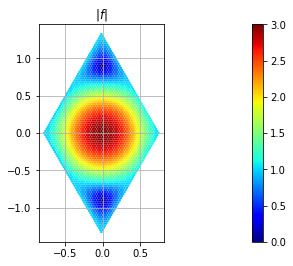

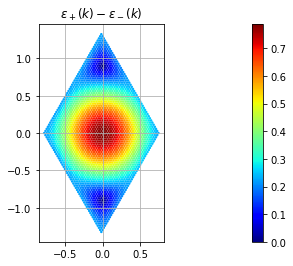

In [79]:
k_list = []
epsplus_list = []
epsminus_list = []
f_list = []
Z = 4.0
gamma = -3.033/Hartree2eV
s = 0.129
N1k = 48
N2k = 48
for i1 in range(N1k):
    for i2 in range(N2k):
        k = (i1/N1k - 1/2)*b1 + (i2/N2k - 1/2)*b2 
        #k = (i1/N1k)*b1 + (i2/N2k)*b2 
        k_list.append(k)
#
for k in k_list:
    #print(k)
    f, epsplus, epsminus, cAplus, cBplus, cAminus, cBminus = k2fepscAcB(k, a1, a2, RA[:2], RB[:2], gamma, s)
    f_list.append(f)
    epsplus_list.append(epsplus)
    epsminus_list.append(epsminus)
k_array = np.array(k_list)
f_array = np.array(f_list)
epsplus_array = np.array(epsplus_list)
epsminus_array = np.array(epsminus_list)
plt.figure()
plt.title('$|f|$')
plt.scatter(k_array[:,0], k_array[:,1], s = 5000.0/(N1k*N2k), c=np.abs(f_array), cmap=plt.cm.jet)
plt.grid()
plt.colorbar()
plt.axis('scaled')
plt.show()
#
plt.figure()
plt.title('$\epsilon_+(k) - \epsilon_-(k)$')
plt.scatter(k_array[:,0], k_array[:,1], s = 5000.0/(N1k*N2k), c=(epsminus_array - epsplus_array), cmap=plt.cm.jet)
plt.grid()
plt.colorbar()
plt.axis('scaled')
plt.show()


In [80]:
gamma = -3.033/Hartree2eV
s = 0.129
get_phiAO = AtomicOrbital.get_2pz
N2belarge = 4
#
k_list = []
kchar_list = []
#
## Gamma
k = np.array([0.0, 0.0])
k_list.append(k)
kchar_list.append('Gamma')
## M
k = 0.5*b1 + 0.5*b2
k_list.append(k)
kchar_list.append('M')
## K
k = (1.0/3.0)*b1 + (2.0/3.0)*b2
k_list.append(k)
kchar_list.append('K')
## K'
k = (2.0/3.0)*b1 + (1.0/3.0)*b2
k_list.append(k)
kchar_list.append('Kprime')
for ik in range(len(k_list)):
    print(kchar_list[ik])
    k = k_list[ik]
    f, epsplus, epsminus, cAplus, cBplus, cAminus, cBminus = k2fepscAcB(k, a1, a2, RA[:2], RB[:2], gamma, s)
    %prun  phinkA, N1, N2 = get_phink(r, RA, Z, k, get_phiAO, N1=N2belarge, N2=N2belarge)
    phinkB, N1, N2 = get_phink(r, RB, Z, k, get_phiAO, N1=N2belarge, N2=N2belarge)
    psikplus = cAplus*phinkA + cBplus*phinkB
    psikminus = cAminus*phinkA + cBminus*phinkB
    print('The norm of psikplus orbital', np.sum((np.abs(psikplus))**2)*dV*(N1*N2))
    print('The norm of psikminus orbital', np.sum((np.abs(psikminus))**2)*dV*(N1*N2))

Gamma
 The norm of psikplus orbital 1.0519624174803583
The norm of psikminus orbital 1.059399768295623
M
 The norm of psikplus orbital 0.978417730868605
The norm of psikminus orbital 0.9863141075529721
K
 The norm of psikplus orbital 0.9730817464332219
The norm of psikminus orbital 0.97309594941877
Kprime
 The norm of psikplus orbital 0.9730833534452165
The norm of psikminus orbital 0.9730943424067755


In [88]:
Z = 4.0
gamma = -3.033/Hartree2eV
s = 0.129
get_phiAO = AtomicOrbital.get_2pz
#
k_list = []
normkplus_list = []
normkminus_list = []
f_list = []
N1k = 12
N2k = 12
N2belarge = 8
for i1 in range(N1k):
    for i2 in range(N2k):
        k = (i1/N1k - 1/2)*b1 + (i2/N2k - 1/2)*b2
        #k = (i1/N1k - 1/2)*b1 + (i2/N2k - 1/2)*b2 
        #k = (i1/N1k)*b1 + (i2/N2k)*b2 
        k_list.append(k)
N2belarge = 4
#
for k in k_list:
    print(k)
    f, epsplus, epsminus, cAplus, cBplus, cAminus, cBminus = k2fepscAcB(k, a1, a2, RA[:2], RB[:2], gamma, s)
    f_list.append(f)
    phinkA, N1, N2 = get_phink(r, RA, Z, k, get_phiAO, N1=N2belarge, N2=N2belarge)
    phinkA, N1, N2 = get_phink(r, RA, Z, k, get_phiAO, N1=N2belarge, N2=N2belarge)
    psikplus = cAplus*phinkA + cBplus*phinkB
    psikminus = cAminus*phinkA + cBminus*phinkB
    normkplus = np.sum((np.abs(psikplus))**2)*dV*(N1*N2)
    normkminus = np.sum((np.abs(psikminus))**2)*dV*(N1*N2)
    #print('The norms of psikplus, and psikminus orbital', normkplus, normkminus, (normkplus - normkminus)/(normkplus + normkminus)*2.0)
    normkplus_list.append(normkplus)
    normkminus_list.append(normkminus)
normkplus_array = np.array(normkplus_list)
normkminus_array = np.array(normkminus_list)
f_array = np.array(f_list)
print(np.sum(normkplus_array)/(N1k*N2k))
print(np.sum(normkminus_array)/(N1k*N2k))

[-0.78038049  0.        ]
[-0.71534879  0.11263822]
[-0.65031708  0.22527644]
[-0.58528537  0.33791467]
[-0.52025366  0.45055289]
[-0.45522196  0.56319111]
[-0.39019025  0.67582933]
[-0.32515854  0.78846755]
[-0.26012683  0.90110578]
[-0.19509512  1.013744  ]
[-0.13006342  1.12638222]
[-0.06503171  1.23902044]
[-0.71534879 -0.11263822]
[-0.65031708  0.        ]
[-0.58528537  0.11263822]
[-0.52025366  0.22527644]
[-0.45522196  0.33791467]
[-0.39019025  0.45055289]
[-0.32515854  0.56319111]
[-0.26012683  0.67582933]
[-0.19509512  0.78846755]
[-0.13006342  0.90110578]
[-0.06503171  1.013744  ]
[-5.55111512e-17  1.12638222e+00]
[-0.65031708 -0.22527644]
[-0.58528537 -0.11263822]
[-0.52025366  0.        ]
[-0.45522196  0.11263822]
[-0.39019025  0.22527644]
[-0.32515854  0.33791467]
[-0.26012683  0.45055289]
[-0.19509512  0.56319111]
[-0.13006342  0.67582933]
[-0.06503171  0.78846755]
[0.         0.90110578]
[0.06503171 1.013744  ]
[-0.58528537 -0.33791467]
[-0.52025366 -0.22527644]
[-0.4552

(144, 2)


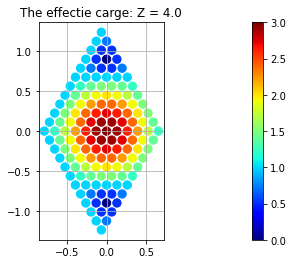

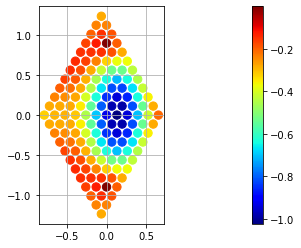

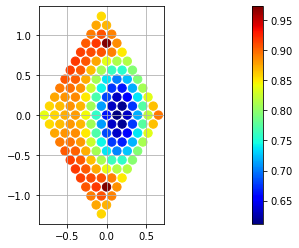

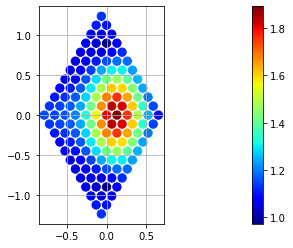

In [89]:
k_array = np.array(k_list)
#print(k_array.shape)
k_array = np.array(k_list)
print(k_array.shape)
plt.figure()
plt.title('The effectie carge: Z = '+str(Z))
plt.scatter(k_array[:,0], k_array[:,1], s = 10000.0/(N1k*N2k), c=np.abs(f_array), cmap=plt.cm.jet)
plt.grid()
plt.colorbar()
plt.axis('scaled')
plt.show()
#
plt.figure()
plt.scatter(k_array[:,0], k_array[:,1], s = 10000.0/(N1k*N2k), c=(normkplus_array - normkminus_array)/(normkplus_array + normkminus_array)*2.0, cmap=plt.cm.jet)
plt.grid()
plt.colorbar()
plt.axis('scaled')
plt.show()
#
plt.figure()
plt.scatter(k_array[:,0], k_array[:,1], s = 10000.0/(N1k*N2k), c=normkplus_array, cmap=plt.cm.jet)
plt.grid()
plt.colorbar()
plt.axis('scaled')
plt.show()
#
plt.figure()
plt.scatter(k_array[:,0], k_array[:,1], s = 10000.0/(N1k*N2k), c=normkminus_array, cmap=plt.cm.jet)
plt.grid()
plt.colorbar()
plt.axis('scaled')
plt.show()

In [4]:
# Generate spatial cordinate in the Honeycomb cell
def get_rgrid_Honeycomb(N1, N2, Nz, Lz, a=4.6485):
    # Lz is the size of spatial box z axis.
    # `r` is generated in the primitive cell
    # N1, N2, Nz are number of spatial uniform grid along a1, a2, and z zxes
    a1 = a*np.array([np.sqrt(3.0)/2.0, -1.0/2.0])
    a2 = a*np.array([np.sqrt(3.0)/2.0, +1.0/2.0])
    b1 = (tpi/a)*np.array([1.0/np.sqrt(3.0), -1.0])
    b2 = (tpi/a)*np.array([1.0/np.sqrt(3.0), +1.0])
    dz = Lz/Nz #z-grid size
    S = a1[0]*a2[1] - a1[1]*a2[0]
    V = S*Lz #Volume
    dS = S/(N1*N2) #Surface of the discretized box
    dV = V/(N1*N2*Nz) #Volume of the discretized box
    r = np.zeros([N1*N2*Nz,3],dtype = "float64")
    n = 0
    for i1 in range(N1):
        for i2 in range(N2):
            for iz in range(Nz):
                r[n, 0] = i1/N1*a1[0] + i2/N2*a2[0]
                r[n, 1] = i1/N1*a1[1] + i2/N2*a2[1]
                r[n, 2] = -Lz/2.0 + iz*dz
                n += 1
    return r, dV, V, a1, a2, b1, b2
# Check of nomarlization 2pz orbital
## Generate spatial grids
a = 8.0 #So large cell
Lz = 8.0
N1 = 80
N2 = 80
Nz = 80
r, dV, V, a1, a2, b1, b2 = get_rgrid_Honeycomb(N1, N2, Nz, Lz, a=a)
## Determine atomic position and the effective charge
Rc = np.array([0.5*(np.sqrt(3.0)*a), 0.0, 0.0]) #Center of the lattice
print(Rc)
Z = 4.0
## 2pz
phi = get_2pz(r, Rc, Z)
print('max, min = ', np.amax(np.abs(phi)), np.amin(np.abs(phi)))
print('The norm of 2pz orbital', np.sum(phi*phi)*dV, ', should be close to 1 because isolated atom in a large honeycomb cell')


[6.92820323 0.         0.        ]
max, min =  0.5870506526949595 0.0
The norm of 2pz orbital 0.9998614648412059 , should be close to 1 because isolated atom in a large honeycomb cell


In [5]:
def get_phink(r, Rc, Z, k, N1=10, N2=10):
    phink = (0.0+0.0j)*get_2pz(r, Rc, Z)
    for i1 in range(-N1//2, N1//2):
        for i2 in range(-N2//2, N2//2):
            d = Rc[:2] + i1*a1 + i2*a2
            ekx = np.exp(zI*d)
            d3D = 1.0*Rc
            d3D[:2] = 1.0*d
            phink = phink + get_2pz(r, d3D, Z)
    phink = phink/np.sqrt(N1*N2)
    return phink, N1, N2
#
a = 4.6485 #Lattice constant for graphene
Lz = 8.0
N1 = 80
N2 = 80
Nz = 80
r, dV, V, a1, a2, b1, b2 = get_rgrid_Honeycomb(N1, N2, Nz, Lz, a=a)

Rc = np.array([0.5*(np.sqrt(3.0)*a), 0.0, 0.0]) #The body center of the cell
print(Rc)
Z = 4.0
k = np.array([0.0, 0.0]) #The Gamma point
phink, N1, N2 = get_phink(r, Rc, Z, k)
print('The norm of phink orbital', np.sum((np.abs(phink))**2)*dV*(N1*N2))

Rc = np.array([0.0, 0.0, 0.0]) #The origin of the coordinate
print(Rc)
Z = 4.0
k = np.array([0.0, 0.0]) #The Gamma point
phink, N1, N2 = get_phink(r, Rc, Z, k)
print('The norm of phink orbital', np.sum((np.abs(phink))**2)*dV*(N1*N2))

Rc = np.array([-0.5*(np.sqrt(3.0)*a), 0.0, 0.0]) #Outside of the cell
print(Rc)
Z = 4.0
k = np.array([0.0, 0.0]) #The Gamma point
phink, N1, N2 = get_phink(r, Rc, Z, k)
print('The norm of phink orbital', np.sum((np.abs(phink))**2)*dV*(N1*N2))

print('When these three norms with differnt atom poisitions show the same value, the code seems written well.')

[4.02571909 0.         0.        ]
The norm of phink orbital 1.0543053843417938
[0. 0. 0.]
The norm of phink orbital 1.0543053843415422
[-4.02571909  0.          0.        ]
The norm of phink orbital 1.0543053843349006
When these three norms with differnt atom poisitions show the same value, the code seems written well.


In [6]:
#
a = 4.6485
Z = 4.0
#
Lz = 8.0
N1 = 80
N2 = 80
Nz = 80
r, dV, V, a1, a2, b1, b2 = get_rgrid_Honeycomb(N1, N2, Nz, Lz, a=a)
#
k = np.array([0.0, 0.0])
#
RA = np.array([(np.sqrt(3.0)*a)/3.0, 0.0, 0.0])
print(RA)
phinkA, N1, N2 = get_phink(r, RA, Z, k)
print('The norm of phink orbital', np.sum((np.abs(phinkA))**2)*dV*(N1*N2))
RB = np.array([2.0*(np.sqrt(3.0)*a)/3.0, 0.0, 0.0])
print(RB)
phinkB, N1, N2 = get_phink(r, RB, Z, k)
print('The norm of phink orbital', np.sum((np.abs(phinkB))**2)*dV*(N1*N2))
#
print('The overlap', np.sum(np.conjugate(phinkA)*phinkB)*dV*(N1*N2))

[2.68381273 0.         0.        ]
The norm of phink orbital 1.0543053842219803
[5.36762545 0.         0.        ]
The norm of phink orbital 1.0543053842219876
The overlap (0.40492824586730425+0j)


# In general
$$
S_{AA}(\mathbf{k})
=
\sum_{\mathbf{T}''} e^{-\mathrm{i}\mathbf{k}\cdot\mathbf{T}''} \int \! \mathrm{d}^3r \ \phi_{2pz} (\mathbf{r}-\mathbf{R}_A ) \phi_{2pz} (\mathbf{r}-\mathbf{R}_A  + \mathbf{T}''), \\
S_{AB}(\mathbf{k})
=
\sum_{\mathbf{T}''} e^{-\mathrm{i}\mathbf{k}\cdot(\mathbf{R}_A - \mathbf{R}_B + \mathbf{T}'') } \int \! \mathrm{d}^3r \ \phi_{2pz} (\mathbf{r}-\mathbf{R}_A ) \phi_{2pz} (\mathbf{r}-\mathbf{R}_B + \mathbf{T}''), 
$$


## Nearest negibhbour
$$
S_{AA}(\mathbf{k})^{(0)}
=
\sum_{\mathbf{T}''=0} e^{-\mathrm{i}\mathbf{k}\cdot\mathbf{T}''} \int \! \mathrm{d}^3r \ \phi_{2pz} (\mathbf{r}-\mathbf{R}_A ) \phi_{2pz} (\mathbf{r}-\mathbf{R}_A  + \mathbf{T}''), \\
=1, \\
S_{AB}(\mathbf{k})^{(0)}
=
\sum_{\mathbf{T}''=\mathbf{0}, +\mathbf{a}_1, +\mathbf{a}_2} e^{-\mathrm{i}\mathbf{k}\cdot(\mathbf{R}_A - \mathbf{R}_B + \mathbf{T}'') } \int \! \mathrm{d}^3r \ \phi_{2pz} (\mathbf{r}-\mathbf{R}_A ) \phi_{2pz} (\mathbf{r}-\mathbf{R}_B + \mathbf{T}'') \\
=
t \left(e^{-\mathrm{i}\mathbf{k}\cdot(\mathbf{R}_A - \mathbf{R}_B) } + e^{-\mathrm{i}\mathbf{k}\cdot(\mathbf{R}_A - \mathbf{R}_B +  \mathbf{a}_1) } + e^{-\mathrm{i}\mathbf{k}\cdot(\mathbf{R}_A - \mathbf{R}_B + \mathbf{a}_2) } \right)  =t f(\mathbf{k}) \\
f(\mathbf{k})
=
 e^{-\mathrm{i}\mathbf{k}\cdot(\mathbf{R}_A - \mathbf{R}_B) } \left(1 + e^{-\mathrm{i}\mathbf{k}  \mathbf{a}_1 } + e^{-\mathrm{i}\mathbf{k}\cdot\mathbf{a}_2  } \right) 
=
e^{+\mathrm{i}\frac{a}{\sqrt{3}}k_x } \left\{ 1 + 2 e^{-\mathrm{i}\frac{\sqrt{3}a}{2}k_x} \cos \left[ \frac{a}{2}k_y \right] \right\} 
$$


# Eq.(3) in NJP 24 (2022) 033051

$$
f(\mathbf{k})
=
\exp \left( \mathrm{i} \frac{k_x a}{\sqrt{3}}\right) + 2  \exp \left( -\mathrm{i} \frac{k_x a}{2\sqrt{3}}\right) \cos \left( \frac{k_y a}{2}\right)
$$

In [7]:
#
def k2fepscAcB(k, a1, a2, RA, RB, gamma, s):
    term1 = np.exp(-zI*np.sum(k*(RA-RB)))
    term2 = 1.0 + np.exp(-zI*np.sum(k*a1)) + np.exp(-zI*np.sum(k*a2))
    #term2 = 1.0 + np.exp(zI*np.sum(k*a1)) + np.exp(zI*np.sum(k*a2))
    f = term1*term2
    fabs = np.abs(f)
    epsplus = +gamma*fabs/(1.0 + s*fabs)
    epsminus = -gamma*fabs/(1.0 - s*fabs)
    cAplus = 1.0/np.sqrt(2.0*(1.0+s*fabs))
    cBplus = (np.conj(f)/fabs)/np.sqrt(2.0*(1.0+s*fabs))
    cAminus = 1.0/np.sqrt(2.0*(1.0-s*fabs))
    cBminus = -(np.conj(f)/fabs)/np.sqrt(2.0*(1.0-s*fabs))
    return f, epsplus, epsminus, cAplus, cBplus, cAminus, cBminus 
gamma = -3.033/Hartree2eV
s = 0.129
# Gamma
print('Gamma')
k = np.array([0.0, 0.0])
f, epsplus, epsminus,  cAplus, cBplus, cAminus, cBminus = k2fepscAcB(k, a1, a2, RA[:2], RB[:2], gamma, s)
plusnorm = np.conj(cAplus)*cAplus + s*f*np.conj(cAplus)*cBplus + + s*np.conj(f)*np.conj(cBplus)*cAplus + np.conj(cBplus)*cBplus
minusnorm = np.conj(cAminus)*cAminus + s*f*np.conj(cAminus)*cBminus + + s*np.conj(f)*np.conj(cBminus)*cAminus + np.conj(cBminus)*cBminus
print(plusnorm, minusnorm)
print(epsplus, epsminus)
# M
print('M')
k = 0.5*b1 + 0.5*b2
f, epsplus, epsminus, cAplus, cBplus, cAminus, cBminus = k2fepscAcB(k, a1, a2, RA[:2], RB[:2], gamma, s)
plusnorm = np.conj(cAplus)*cAplus + s*f*np.conj(cAplus)*cBplus + + s*np.conj(f)*np.conj(cBplus)*cAplus + np.conj(cBplus)*cBplus
minusnorm = np.conj(cAminus)*cAminus + s*f*np.conj(cAminus)*cBminus + + s*np.conj(f)*np.conj(cBminus)*cAminus + np.conj(cBminus)*cBminus
print(plusnorm, minusnorm)
print(epsplus, epsminus)
# K
print('K')
k = (1.0/3.0)*b1 + (2.0/3.0)*b2
f, epsplus, epsminus, cAplus, cBplus, cAminus, cBminus = k2fepscAcB(k, a1, a2, RA[:2], RB[:2], gamma, s)
plusnorm = np.conj(cAplus)*cAplus + s*f*np.conj(cAplus)*cBplus + + s*np.conj(f)*np.conj(cBplus)*cAplus + np.conj(cBplus)*cBplus
minusnorm = np.conj(cAminus)*cAminus + s*f*np.conj(cAminus)*cBminus + + s*np.conj(f)*np.conj(cBminus)*cAminus + np.conj(cBminus)*cBminus
print(plusnorm, minusnorm)
print(epsplus, epsminus)
# K'
print('Kprime')
k = (2.0/3.0)*b1 + (1.0/3.0)*b2
f, epsplus, epsminus, cAplus, cBplus, cAminus, cBminus = k2fepscAcB(k, a1, a2, RA[:2], RB[:2], gamma, s)
plusnorm = np.conj(cAplus)*cAplus + s*f*np.conj(cAplus)*cBplus + + s*np.conj(f)*np.conj(cBplus)*cAplus + np.conj(cBplus)*cBplus
minusnorm = np.conj(cAminus)*cAminus + s*f*np.conj(cAminus)*cBminus + + s*np.conj(f)*np.conj(cBminus)*cAminus + np.conj(cBminus)*cBminus
print(plusnorm, minusnorm)
print(epsplus, epsminus)

Gamma
(0.9999999999999998+0j) (1+0j)
-0.24108297222515124 0.545484636992308
M
(1.0000000000000004-2.3211666433381225e-18j) (1.0000000000000004+5.257341300373346e-18j)
-0.09872514983061255 0.12796865001005922
K
(0.9999999999999998+9.025469129932658e-34j) (1-3.0814879110195774e-33j)
-6.663938374035729e-17 6.66393837403573e-17
Kprime
(0.9999999999999998-2.1789409980263115e-33j) (1+0j)
-6.459742800187834e-17 6.459742800187835e-17


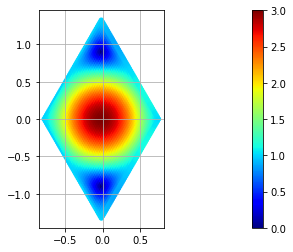

In [26]:
k_list = []
epsplus_list = []
epsminus_list = []
f_list = []
Z = 4.0
gamma = -3.033/Hartree2eV
s = 0.129
N1k = 48
N2k = 48
for i1 in range(N1k):
    for i2 in range(N2k):
        k = (i1/N1k - 1/2)*b1 + (i2/N2k - 1/2)*b2 
        #k = (i1/N1k)*b1 + (i2/N2k)*b2 
        k_list.append(k)
#
for k in k_list:
    #print(k)
    f, epsplus, epsminus, cAplus, cBplus, cAminus, cBminus = k2fepscAcB(k, a1, a2, RA[:2], RB[:2], gamma, s)
    f_list.append(f)
    epsplus_list.append(epsplus)
    epsminus_list.append(epsminus)
k_array = np.array(k_list)
f_array = np.array(f_list)
epsplus_array = np.array(epsplus_list)
epsminus_array = np.array(epsminus_list)
#print(k_array.shape)
plt.figure()
#plt.scatter(k_array[:,0], k_array[:,1], s = 20, c=(epsminus_array - epsplus_array), cmap=plt.cm.jet)
plt.scatter(k_array[:,0], k_array[:,1], s = 20, c=np.abs(f_array), cmap=plt.cm.jet)
#plt.plot(np.array([0.0, 1.0, 2.0]))
plt.grid()
plt.colorbar()
plt.axis('scaled')
plt.show()


In [9]:
k_list = []
gamma = -3.033/Hartree2eV
s = 0.129
k = np.array([0.0, 0.0])
k_list.append(k)
k = 0.5*b1 + 0.5*b2
k_list.append(k)
k = (1.0/3.0)*b1 + (2.0/3.0)*b2
k_list.append(k)
k = (2.0/3.0)*b1 + (1.0/3.0)*b2
k_list.append(k)
for k in k_list:
    print(k)
    f, epsplus, epsminus, cAplus, cBplus, cAminus, cBminus = k2fepscAcB(k, a1, a2, RA[:2], RB[:2], gamma, s)
    phinkA, N1, N2 = get_phink(r, RA, Z, k)
    phinkB, N1, N2 = get_phink(r, RB, Z, k)
    psikplus = cAplus*phinkA + cBplus*phinkB
    psikminus = cAminus*phinkA + cBminus*phinkB
    print('The norm of psikplus orbital', np.sum((np.abs(psikplus))**2)*dV*(N1*N2))
    print('The norm of psikminus orbital', np.sum((np.abs(psikminus))**2)*dV*(N1*N2))

[0. 0.]
The norm of psikplus orbital 1.0520790411602652
The norm of psikminus orbital 1.0593428031887102
[0.78038049 0.        ]
The norm of psikplus orbital 1.1131705112095986
The norm of psikminus orbital 0.9780037443034804
[0.78038049 0.45055289]
The norm of psikplus orbital 1.3047085827463767
The norm of psikminus orbital 0.8039021856975901
[ 0.78038049 -0.45055289]
The norm of psikplus orbital 1.332016494047548
The norm of psikminus orbital 0.7765942743964198


In [10]:
Z = 4.0
gamma = -3.033/Hartree2eV
s = 0.129
#
k_list = []
normkplus_list = []
normkminus_list = []
N1k = 8
N2k = 8
for i1 in range(N1k):
    for i2 in range(N2k):
        k = (i1/N1k)*b1 + (i2/N2k)*b2 
        k_list.append(k)
#
for k in k_list:
    print(k)
    f, epsplus, epsminus, cAplus, cBplus, cAminus, cBminus = k2fepscAcB(k, a1, a2, RA[:2], RB[:2], gamma, s)
    phinkA, N1, N2 = get_phink(r, RA, Z, k)
    phinkB, N1, N2 = get_phink(r, RB, Z, k)
    psikplus = cAplus*phinkA + cBplus*phinkB
    psikminus = cAminus*phinkA + cBminus*phinkB
    normkplus = np.sum((np.abs(psikplus))**2)*dV*(N1*N2)
    normkminus = np.sum((np.abs(psikminus))**2)*dV*(N1*N2)
    print('The norms of psikplus, and psikminus orbital', normkplus, normkminus, (normkplus - normkminus)/(normkplus + normkminus)*2.0)
    normkplus_list.append(normkplus)
    normkminus_list.append(normkminus)
normkplus_array = np.array(normkplus_list)
normkminus_array = np.array(normkminus_list)
print(np.sum(normkplus_array)/(N1k*N2k))
print(np.sum(normkminus_array)/(N1k*N2k))

[0. 0.]
The norms of psikplus, and psikminus orbital 1.0520790411602652 1.0593428031887102 -0.006880446034870593
[0.09754756 0.16895733]
The norms of psikplus, and psikminus orbital 1.0722241649155644 1.0161461967384404 0.05370500291213652
[0.19509512 0.33791467]
The norms of psikplus, and psikminus orbital 1.1319826369352626 0.9136492661068705 0.21346300915985977
[0.29264269 0.506872  ]
The norms of psikplus, and psikminus orbital 1.212428276404064 0.8219542732182323 0.383874707594525
[0.39019025 0.67582933]
The norms of psikplus, and psikminus orbital 1.1131705112095986 0.9780037443034807 0.12927355675862046
[0.48773781 0.84478667]
The norms of psikplus, and psikminus orbital 0.8054584364241875 1.4199694825242704 -0.5522632666444187
[0.58528537 1.013744  ]
The norms of psikplus, and psikminus orbital 0.6777244679910467 1.7362091331714073 -0.8769791055318478
[0.68283293 1.18270133]
The norms of psikplus, and psikminus orbital 0.6275516530216069 1.9631047002385609 -1.031053806527639
[ 

(64, 2)


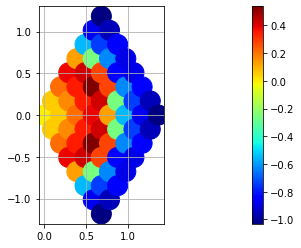

In [11]:
k_array = np.array(k_list)
print(k_array.shape)
plt.figure()
plt.scatter(k_array[:,0], k_array[:,1], s = 400, c=(normkplus_array - normkminus_array)/(normkplus_array + normkminus_array)*2.0, cmap=plt.cm.jet)
#plt.plot(np.array([0.0, 1.0, 2.0]))
plt.grid()
plt.colorbar()
plt.axis('scaled')
plt.show()

In [12]:
Z = 3.13
gamma = -3.033/Hartree2eV
s = 0.129
#
k_list = []
normkplus_list = []
normkminus_list = []
N1k = 8
N2k = 8
for i1 in range(N1k):
    for i2 in range(N2k):
        k = (i1/N1k)*b1 + (i2/N2k)*b2 
        k_list.append(k)
#
for k in k_list:
    print(k)
    f, epsplus, epsminus, cAplus, cBplus, cAminus, cBminus = k2fepscAcB(k, a1, a2, RA[:2], RB[:2], gamma, s)
    phinkA, N1, N2 = get_phink(r, RA, Z, k)
    phinkB, N1, N2 = get_phink(r, RB, Z, k)
    psikplus = cAplus*phinkA + cBplus*phinkB
    psikminus = cAminus*phinkA + cBminus*phinkB
    normkplus = np.sum((np.abs(psikplus))**2)*dV*(N1*N2)
    normkminus = np.sum((np.abs(psikminus))**2)*dV*(N1*N2)
    print('The norms of psikplus, and psikminus orbital', normkplus, normkminus, (normkplus - normkminus)/(normkplus + normkminus)*2.0)
    normkplus_list.append(normkplus)
    normkminus_list.append(normkminus)
normkplus_array = np.array(normkplus_list)
normkminus_array = np.array(normkminus_list)
print(np.sum(normkplus_array)/(N1k*N2k))
print(np.sum(normkminus_array)/(N1k*N2k))

[0. 0.]
The norms of psikplus, and psikminus orbital 1.4912575748690273 0.6433154549198237 0.7944840566387938
[0.09754756 0.16895733]
The norms of psikplus, and psikminus orbital 1.5198082127564838 0.6171014902409659 0.8448711906256857
[0.19509512 0.33791467]
The norms of psikplus, and psikminus orbital 1.6041492463916136 0.5563314344547311 0.9699858195690148
[0.29264269 0.506872  ]
The norms of psikplus, and psikminus orbital 1.7096314297412116 0.528580016241559 1.0553528493650142
[0.39019025 0.67582933]
The norms of psikplus, and psikminus orbital 1.46135410604426 0.93324666416214 0.44108182746186997
[0.48773781 0.84478667]
The norms of psikplus, and psikminus orbital 0.8684003911710703 1.764713277689468 -0.6808007547249344
[0.58528537 1.013744  ]
The norms of psikplus, and psikminus orbital 0.6651703990676726 2.2566119547287466 -1.0893635205875167
[0.68283293 1.18270133]
The norms of psikplus, and psikminus orbital 0.6006434927795837 2.574521444067575 -1.2433230969399602
[ 0.0975475

(64, 2)


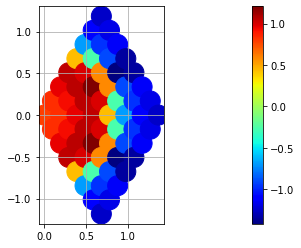

In [13]:
k_array = np.array(k_list)
print(k_array.shape)
plt.figure()
plt.scatter(k_array[:,0], k_array[:,1], s = 400, c=(normkplus_array - normkminus_array)/(normkplus_array + normkminus_array)*2.0, cmap=plt.cm.jet)
#plt.plot(np.array([0.0, 1.0, 2.0]))
plt.grid()
plt.colorbar()
plt.axis('scaled')
plt.show()

In [14]:
Z = 2.5
gamma = -3.033/Hartree2eV
s = 0.129
#
k_list = []
normkplus_list = []
normkminus_list = []
N1k = 8
N2k = 8
for i1 in range(N1k):
    for i2 in range(N2k):
        k = (i1/N1k)*b1 + (i2/N2k)*b2 
        k_list.append(k)
#
for k in k_list:
    print(k)
    f, epsplus, epsminus, cAplus, cBplus, cAminus, cBminus = k2fepscAcB(k, a1, a2, RA[:2], RB[:2], gamma, s)
    phinkA, N1, N2 = get_phink(r, RA, Z, k)
    phinkB, N1, N2 = get_phink(r, RB, Z, k)
    psikplus = cAplus*phinkA + cBplus*phinkB
    psikminus = cAminus*phinkA + cBminus*phinkB
    normkplus = np.sum((np.abs(psikplus))**2)*dV*(N1*N2)
    normkminus = np.sum((np.abs(psikminus))**2)*dV*(N1*N2)
    print('The norms of psikplus, and psikminus orbital', normkplus, normkminus, (normkplus - normkminus)/(normkplus + normkminus)*2.0)
    normkplus_list.append(normkplus)
    normkminus_list.append(normkminus)
normkplus_array = np.array(normkplus_list)
normkminus_array = np.array(normkminus_list)
print(np.sum(normkplus_array)/(N1k*N2k))
print(np.sum(normkminus_array)/(N1k*N2k))

[0. 0.]
The norms of psikplus, and psikminus orbital 2.1845444864757457 0.32555179148501695 1.4812122636993035
[0.09754756 0.16895733]
The norms of psikplus, and psikminus orbital 2.2263655797485304 0.3123169652089982 1.507907019206731
[0.19509512 0.33791467]
The norms of psikplus, and psikminus orbital 2.3496559764387954 0.28403694494999454 1.5686103833240859
[0.29264269 0.506872  ]
The norms of psikplus, and psikminus orbital 2.4980356681437854 0.3168529068210921 1.5497471414831467
[0.39019025 0.67582933]
The norms of psikplus, and psikminus orbital 2.0570090470340787 1.0415192156380033 0.6554659149827124
[0.48773781 0.84478667]
The norms of psikplus, and psikminus orbital 1.0757004416646254 2.4068802616942295 -0.7644789501909989
[0.58528537 1.013744  ]
The norms of psikplus, and psikminus orbital 0.7620508712614017 3.158834435770829 -1.222572647157376
[0.68283293 1.18270133]
The norms of psikplus, and psikminus orbital 0.6722617720928521 3.6218802429418355 -1.3737871083544764
[ 0.09

(64, 2)


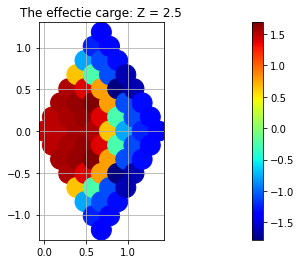

In [15]:
k_array = np.array(k_list)
print(k_array.shape)
plt.figure()
plt.title('The effectie carge: Z = '+str(Z))
plt.scatter(k_array[:,0], k_array[:,1], s = 400, c=(normkplus_array - normkminus_array)/(normkplus_array + normkminus_array)*2.0, cmap=plt.cm.jet)
#plt.plot(np.array([0.0, 1.0, 2.0]))
plt.grid()
plt.colorbar()
plt.axis('scaled')
plt.show()

In [16]:
Z = 6.0
gamma = -3.033/Hartree2eV
s = 0.129
#
k_list = []
normkplus_list = []
normkminus_list = []
N1k = 8
N2k = 8
for i1 in range(N1k):
    for i2 in range(N2k):
        k = (i1/N1k)*b1 + (i2/N2k)*b2 
        k_list.append(k)
#
for k in k_list:
    print(k)
    f, epsplus, epsminus, cAplus, cBplus, cAminus, cBminus = k2fepscAcB(k, a1, a2, RA[:2], RB[:2], gamma, s)
    phinkA, N1, N2 = get_phink(r, RA, Z, k)
    phinkB, N1, N2 = get_phink(r, RB, Z, k)
    psikplus = cAplus*phinkA + cBplus*phinkB
    psikminus = cAminus*phinkA + cBminus*phinkB
    normkplus = np.sum((np.abs(psikplus))**2)*dV*(N1*N2)
    normkminus = np.sum((np.abs(psikminus))**2)*dV*(N1*N2)
    print('The norms of psikplus, and psikminus orbital', normkplus, normkminus, (normkplus - normkminus)/(normkplus + normkminus)*2.0)
    normkplus_list.append(normkplus)
    normkminus_list.append(normkminus)
normkplus_array = np.array(normkplus_list)
normkminus_array = np.array(normkminus_list)
print(np.sum(normkplus_array)/(N1k*N2k))
print(np.sum(normkminus_array)/(N1k*N2k))

[0. 0.]
The norms of psikplus, and psikminus orbital 0.7701952789861274 1.5246443014413804 -0.6575178752274318
[0.09754756 0.16895733]
The norms of psikplus, and psikminus orbital 0.7849462678219583 1.4624581477098684 -0.6029283160659658
[0.19509512 0.33791467]
The norms of psikplus, and psikminus orbital 0.8290104385314538 1.3136542073463693 -0.4523748219277337
[0.29264269 0.506872  ]
The norms of psikplus, and psikminus orbital 0.8953605811526113 1.1573016231852948 -0.25522079714735485
[0.39019025 0.67582933]
The norms of psikplus, and psikminus orbital 0.9166052950940751 1.1113897021539774 -0.1920955498649856
[0.48773781 0.84478667]
The norms of psikplus, and psikminus orbital 0.8281967010266437 1.2559944939722858 -0.4105168412304533
[0.58528537 1.013744  ]
The norms of psikplus, and psikminus orbital 0.7540423740510008 1.4494045919711513 -0.6311585698615446
[0.68283293 1.18270133]
The norms of psikplus, and psikminus orbital 0.7115601631277242 1.6187385428774632 -0.7785940724353811

(64, 2)


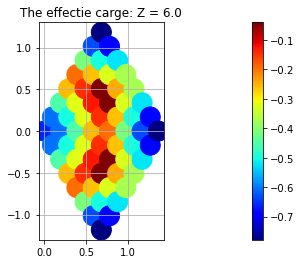

In [17]:
k_array = np.array(k_list)
print(k_array.shape)
plt.figure()
plt.title('The effectie carge: Z = '+str(Z))
plt.scatter(k_array[:,0], k_array[:,1], s = 400, c=(normkplus_array - normkminus_array)/(normkplus_array + normkminus_array)*2.0, cmap=plt.cm.jet)
#plt.plot(np.array([0.0, 1.0, 2.0]))
plt.grid()
plt.colorbar()
plt.axis('scaled')
plt.show()

In [18]:
k_list = []
normkplus_list = []
normkminus_list = []
Z = 3.13
gamma = -3.033/Hartree2eV
s = 0.129
N1k = 4
N2k = 4
for i1 in range(N1k):
    for i2 in range(N2k):
        k = (i1/N1k)*b1 + (i2/N2k)*b2 
        k_list.append(k)
#
for k in k_list:
    print(k)
    f, epsplus, epsminus, cAplus, cBplus, cAminus, cBminus = k2fepscAcB(k, a1, a2, RA[:2], RB[:2], gamma, s)
    phinkA, N1, N2 = get_phink(r, RA, Z, k)
    phinkB, N1, N2 = get_phink(r, RB, Z, k)
    psikplus = cAplus*phinkA + cBplus*phinkB
    psikminus = cAminus*phinkA + cBminus*phinkB
    normkplus = np.sum((np.abs(psikplus))**2)*dV*(N1*N2)
    normkminus = np.sum((np.abs(psikminus))**2)*dV*(N1*N2)
    print('The norm of psikplus orbital', normkplus)
    print('The norm of psikminus orbital', normkminus)
    normkplus_list.append(normkplus)
    normkminus_list.append(normkminus)
normkplus_array = np.array(normkplus_list)
normkminus_array = np.array(normkminus_list)
print(np.sum(normkplus_array)/(N1k*N2k))
print(np.sum(normkminus_array)/(N1k*N2k))

[0. 0.]
The norm of psikplus orbital 1.4912575748690273
The norm of psikminus orbital 0.6433154549198237
[0.19509512 0.33791467]
The norm of psikplus orbital 1.6041492463916136
The norm of psikminus orbital 0.5563314344547311
[0.39019025 0.67582933]
The norm of psikplus orbital 1.46135410604426
The norm of psikminus orbital 0.93324666416214
[0.58528537 1.013744  ]
The norm of psikplus orbital 0.6651703990676726
The norm of psikminus orbital 2.2566119547287466
[ 0.19509512 -0.33791467]
The norm of psikplus orbital 1.6041492463916136
The norm of psikminus orbital 0.5563314344547311
[0.39019025 0.        ]
The norm of psikplus orbital 1.6041492463916136
The norm of psikminus orbital 0.5563314344547311
[0.58528537 0.33791467]
The norm of psikplus orbital 1.8320409710747043
The norm of psikminus orbital 0.4527581789504616
[0.78038049 0.67582933]
The norm of psikplus orbital 0.7199803759833696
The norm of psikminus orbital 1.8942236345854977
[ 0.39019025 -0.67582933]
The norm of psikplus orb

In [19]:
k_list = []
normkplus_list = []
normkminus_list = []
Z = 2.4
gamma = -3.033/Hartree2eV
s = 0.129
N1k = 4
N2k = 4
for i1 in range(N1k):
    for i2 in range(N2k):
        k = (i1/N1k)*b1 + (i2/N2k)*b2 
        k_list.append(k)
#
for k in k_list:
    print(k)
    f, epsplus, epsminus, cAplus, cBplus, cAminus, cBminus = k2fepscAcB(k, a1, a2, RA[:2], RB[:2], gamma, s)
    phinkA, N1, N2 = get_phink(r, RA, Z, k)
    phinkB, N1, N2 = get_phink(r, RB, Z, k)
    psikplus = cAplus*phinkA + cBplus*phinkB
    psikminus = cAminus*phinkA + cBminus*phinkB
    normkplus = np.sum((np.abs(psikplus))**2)*dV*(N1*N2)
    normkminus = np.sum((np.abs(psikminus))**2)*dV*(N1*N2)
    print('The norm of psikplus orbital', normkplus)
    print('The norm of psikminus orbital', normkminus)
    normkplus_list.append(normkplus)
    normkminus_list.append(normkminus)
normkplus_array = np.array(normkplus_list)
normkminus_array = np.array(normkminus_list)
print(np.sum(normkplus_array)/(N1k*N2k))
print(np.sum(normkminus_array)/(N1k*N2k))

[0. 0.]
The norm of psikplus orbital 2.345716742544458
The norm of psikminus orbital 0.28110084278813335
[0.19509512 0.33791467]
The norm of psikplus orbital 2.5229806371161323
The norm of psikminus orbital 0.24605892998083603
[0.39019025 0.67582933]
The norm of psikplus orbital 2.1994778968903077
The norm of psikminus orbital 1.0822197393216242
[0.58528537 1.013744  ]
The norm of psikplus orbital 0.7947019882903777
The norm of psikminus orbital 3.3755847213005494
[ 0.19509512 -0.33791467]
The norm of psikplus orbital 2.5229806371161336
The norm of psikminus orbital 0.24605892998083603
[0.39019025 0.        ]
The norm of psikplus orbital 2.5229806371161323
The norm of psikminus orbital 0.24605892998083603
[0.58528537 0.33791467]
The norm of psikplus orbital 2.881761844029375
The norm of psikminus orbital 0.19783561036639008
[0.78038049 0.67582933]
The norm of psikplus orbital 0.8349100026121664
The norm of psikminus orbital 2.8509879972320946
[ 0.39019025 -0.67582933]
The norm of psikp

In [20]:
k_list = []
normkplus_list = []
normkminus_list = []
Z = 2.4
gamma = -3.033/Hartree2eV
s = 0.129
N1k = 8
N2k = 8
for i1 in range(N1k):
    for i2 in range(N2k):
        k = (i1/N1k)*b1 + (i2/N2k)*b2 
        k_list.append(k)
#
for k in k_list:
    print(k)
    f, epsplus, epsminus, cAplus, cBplus, cAminus, cBminus = k2fepscAcB(k, a1, a2, RA[:2], RB[:2], gamma, s)
    phinkA, N1, N2 = get_phink(r, RA, Z, k)
    phinkB, N1, N2 = get_phink(r, RB, Z, k)
    psikplus = cAplus*phinkA + cBplus*phinkB
    psikminus = cAminus*phinkA + cBminus*phinkB
    normkplus = np.sum((np.abs(psikplus))**2)*dV*(N1*N2)
    normkminus = np.sum((np.abs(psikminus))**2)*dV*(N1*N2)
    print('The norm of psikplus orbital', normkplus)
    print('The norm of psikminus orbital', normkminus)
    normkplus_list.append(normkplus)
    normkminus_list.append(normkminus)
normkplus_array = np.array(normkplus_list)
normkminus_array = np.array(normkminus_list)
print(np.sum(normkplus_array)/(N1k*N2k))
print(np.sum(normkminus_array)/(N1k*N2k))

[0. 0.]
The norm of psikplus orbital 2.345716742544458
The norm of psikminus orbital 0.28110084278813335
[0.09754756 0.16895733]
The norm of psikplus orbital 2.39062302389295
The norm of psikminus orbital 0.26968301104406506
[0.19509512 0.33791467]
The norm of psikplus orbital 2.5229806371161323
The norm of psikminus orbital 0.24605892998083603
[0.29264269 0.506872  ]
The norm of psikplus orbital 2.6816258682058542
The norm of psikminus orbital 0.2894510930063004
[0.39019025 0.67582933]
The norm of psikplus orbital 2.1994778968903077
The norm of psikminus orbital 1.0822197393216242
[0.48773781 0.84478667]
The norm of psikplus orbital 1.133261230563797
The norm of psikminus orbital 2.5646703154119885
[0.58528537 1.013744  ]
The norm of psikplus orbital 0.7947019882903777
The norm of psikminus orbital 3.3755847213005494
[0.68283293 1.18270133]
The norm of psikplus orbital 0.6988141351012994
The norm of psikminus orbital 3.8724980506217617
[ 0.09754756 -0.16895733]
The norm of psikplus or

In [21]:
k_list = []
normkplus_list = []
normkminus_list = []
Z = 2.4
gamma = -3.033/Hartree2eV
s = 0.129
N1k = 4
N2k = 4
for i1 in range(N1k):
    for i2 in range(N2k):
        k = (i1/N1k - 1/2)*b1 + (i2/N2k - 1/2)*b2 
        k_list.append(k)
#
for k in k_list:
    print(k)
    f, epsplus, epsminus, cAplus, cBplus, cAminus, cBminus = k2fepscAcB(k, a1, a2, RA[:2], RB[:2], gamma, s)
    phinkA, N1, N2 = get_phink(r, RA, Z, k)
    phinkB, N1, N2 = get_phink(r, RB, Z, k)
    psikplus = cAplus*phinkA + cBplus*phinkB
    psikminus = cAminus*phinkA + cBminus*phinkB
    normkplus = np.sum((np.abs(psikplus))**2)*dV*(N1*N2)
    normkminus = np.sum((np.abs(psikminus))**2)*dV*(N1*N2)
    print('The norm of psikplus orbital', normkplus)
    print('The norm of psikminus orbital', normkminus)
    normkplus_list.append(normkplus)
    normkminus_list.append(normkminus)
normkplus_array = np.array(normkplus_list)
normkminus_array = np.array(normkminus_list)
print(np.sum(normkplus_array)/(N1k*N2k))
print(np.sum(normkminus_array)/(N1k*N2k))

[-0.78038049  0.        ]
The norm of psikplus orbital 2.1994778968903077
The norm of psikminus orbital 1.0822197393216237
[-0.58528537  0.33791467]
The norm of psikplus orbital 2.881761844029375
The norm of psikminus orbital 0.19783561036639008
[-0.39019025  0.67582933]
The norm of psikplus orbital 2.1994778968903077
The norm of psikminus orbital 1.0822197393216242
[-0.19509512  1.013744  ]
The norm of psikplus orbital 0.8349100026121664
The norm of psikminus orbital 2.8509879972320955
[-0.58528537 -0.33791467]
The norm of psikplus orbital 2.881761844029375
The norm of psikminus orbital 0.19783561036639008
[-0.39019025  0.        ]
The norm of psikplus orbital 2.5229806371161323
The norm of psikminus orbital 0.24605892998083603
[-0.19509512  0.33791467]
The norm of psikplus orbital 2.5229806371161336
The norm of psikminus orbital 0.24605892998083603
[0.         0.67582933]
The norm of psikplus orbital 2.881761844029375
The norm of psikminus orbital 0.19783561036639008
[-0.39019025 -0.

In [22]:
k_list = []
normkplus_list = []
normkminus_list = []
Z = 2.0
gamma = -3.033/Hartree2eV
s = 0.129
N1k = 4
N2k = 4
for i1 in range(N1k):
    for i2 in range(N2k):
        k = (i1/N1k - 1/2)*b1 + (i2/N2k - 1/2)*b2 
        k_list.append(k)
#
for k in k_list:
    print(k)
    f, epsplus, epsminus, cAplus, cBplus, cAminus, cBminus = k2fepscAcB(k, a1, a2, RA[:2], RB[:2], gamma, s)
    phinkA, N1, N2 = get_phink(r, RA, Z, k)
    phinkB, N1, N2 = get_phink(r, RB, Z, k)
    psikplus = cAplus*phinkA + cBplus*phinkB
    psikminus = cAminus*phinkA + cBminus*phinkB
    normkplus = np.sum((np.abs(psikplus))**2)*dV*(N1*N2)
    normkminus = np.sum((np.abs(psikminus))**2)*dV*(N1*N2)
    print('The norm of psikplus orbital', normkplus)
    print('The norm of psikminus orbital', normkminus)
    normkplus_list.append(normkplus)
    normkminus_list.append(normkminus)
normkplus_array = np.array(normkplus_list)
normkminus_array = np.array(normkminus_list)
print(np.sum(normkplus_array)/(N1k*N2k))
print(np.sum(normkminus_array)/(N1k*N2k))

[-0.78038049  0.        ]
The norm of psikplus orbital 2.9640959023326694
The norm of psikminus orbital 1.34378047994805
[-0.58528537  0.33791467]
The norm of psikplus orbital 3.9277945186740437
The norm of psikminus orbital 0.09462349045389064
[-0.39019025  0.67582933]
The norm of psikplus orbital 2.9640959023326694
The norm of psikminus orbital 1.3437804799480502
[-0.19509512  1.013744  ]
The norm of psikplus orbital 1.0366986696499145
The norm of psikminus orbital 3.8420944589363737
[-0.58528537 -0.33791467]
The norm of psikplus orbital 3.9277945186740437
The norm of psikminus orbital 0.09462349045389064
[-0.39019025  0.        ]
The norm of psikplus orbital 3.438675289830595
The norm of psikminus orbital 0.12132205538844154
[-0.19509512  0.33791467]
The norm of psikplus orbital 3.438675289830595
The norm of psikminus orbital 0.12132205538844153
[0.         0.67582933]
The norm of psikplus orbital 3.9277945186740437
The norm of psikminus orbital 0.09462349045389064
[-0.39019025 -0.6

In [23]:
k_list = []
normkplus_list = []
normkminus_list = []
Z = 4.0
gamma = -3.033/Hartree2eV
s = 0.129
N1k = 4
N2k = 4
for i1 in range(N1k):
    for i2 in range(N2k):
        k = (i1/N1k - 1/2)*b1 + (i2/N2k - 1/2)*b2 
        k_list.append(k)
#
for k in k_list:
    print(k)
    f, epsplus, epsminus, cAplus, cBplus, cAminus, cBminus = k2fepscAcB(k, a1, a2, RA[:2], RB[:2], gamma, s)
    phinkA, N1, N2 = get_phink(r, RA, Z, k)
    phinkB, N1, N2 = get_phink(r, RB, Z, k)
    psikplus = cAplus*phinkA + cBplus*phinkB
    psikminus = cAminus*phinkA + cBminus*phinkB
    normkplus = np.sum((np.abs(psikplus))**2)*dV*(N1*N2)
    normkminus = np.sum((np.abs(psikminus))**2)*dV*(N1*N2)
    print('The norm of psikplus orbital', normkplus)
    print('The norm of psikminus orbital', normkminus)
    normkplus_list.append(normkplus)
    normkminus_list.append(normkminus)
normkplus_array = np.array(normkplus_list)
normkminus_array = np.array(normkminus_list)
print(np.sum(normkplus_array)/(N1k*N2k))
print(np.sum(normkminus_array)/(N1k*N2k))

[-0.78038049  0.        ]
The norm of psikplus orbital 1.1131705112095986
The norm of psikminus orbital 0.9780037443034804
[-0.58528537  0.33791467]
The norm of psikplus orbital 1.2925010009648261
The norm of psikminus orbital 0.7455535457573819
[-0.39019025  0.67582933]
The norm of psikplus orbital 1.1131705112095986
The norm of psikminus orbital 0.9780037443034807
[-0.19509512  1.013744  ]
The norm of psikplus orbital 0.7545095316991425
The norm of psikminus orbital 1.4429041413956787
[-0.58528537 -0.33791467]
The norm of psikplus orbital 1.2925010009648261
The norm of psikminus orbital 0.7455535457573819
[-0.39019025  0.        ]
The norm of psikplus orbital 1.1319826369352626
The norm of psikminus orbital 0.9136492661068705
[-0.19509512  0.33791467]
The norm of psikplus orbital 1.1319826369352626
The norm of psikminus orbital 0.9136492661068703
[0.         0.67582933]
The norm of psikplus orbital 1.2925010009648261
The norm of psikminus orbital 0.7455535457573819
[-0.39019025 -0.67

(16, 2)


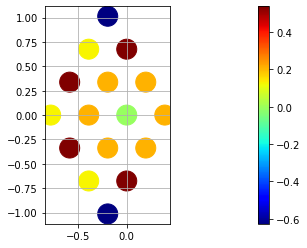

In [24]:
k_array = np.array(k_list)
print(k_array.shape)
plt.figure()
plt.scatter(k_array[:,0], k_array[:,1], s = 400, c=(normkplus_array - normkminus_array)/(normkplus_array + normkminus_array)*2.0, cmap=plt.cm.jet)
#plt.plot(np.array([0.0, 1.0, 2.0]))
plt.grid()
plt.colorbar()
plt.axis('scaled')
plt.show()

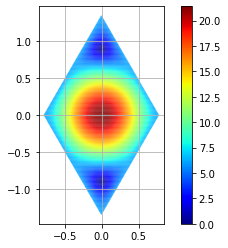

In [25]:
k_list = []
epsplus_list = []
epsminus_list = []
Z = 4.0
gamma = -3.033/Hartree2eV
s = 0.129
N1k = 120
N2k = 120
for i1 in range(N1k):
    for i2 in range(N2k):
        k = (i1/N1k - 1/2)*b1 + (i2/N2k - 1/2)*b2 
        k_list.append(k)
#
for k in k_list:
    #print(k)
    f, epsplus, epsminus, cAplus, cBplus, cAminus, cBminus = k2fepscAcB(k, a1, a2, RA[:2], RB[:2], gamma, s)
    epsplus_list.append(epsplus)
    epsminus_list.append(epsminus)
k_array = np.array(k_list)
epsplus_array = np.array(epsplus_list)
epsminus_array = np.array(epsminus_list)
#print(k_array.shape)
plt.figure()
plt.scatter(k_array[:,0], k_array[:,1], s = 0.1, c=(epsminus_array - epsplus_array)*Hartree2eV, cmap=plt.cm.jet)
#plt.plot(np.array([0.0, 1.0, 2.0]))
plt.axis('scaled')
plt.grid()
plt.colorbar()
plt.show()

In [26]:
# Check of nomarlization or 1s, and 2pz orbitals
## Generate spatial grids
Lx = 8
Ly = 8
Lz = 8
Nx = 80
Ny = 80
Nz = 80
r, dV, V = get_rgrid(Nx, Ny, Nz, Lx, Ly, Lz)
## Determine atomic position and the effective charge
Rc = np.array([0.2, 0.2, 0.2])
print(Rc)
Z = 4.0
## 1s
phi = get_1s(r, Rc, Z)
print('max, min = ', np.amax(np.abs(phi)), np.amin(np.abs(phi)))
print('The norm of 1s orbital', np.sum(phi*phi)*dV)
## 2pz
phi = get_2pz(r, Rc, Z)
print('max, min = ', np.amax(np.abs(phi)), np.amin(np.abs(phi)))
print('The norm of 2pz orbital', np.sum(phi*phi)*dV)


[0.2 0.2 0.2]


NameError: name 'get_1s' is not defined

In [ ]:
# Test code for overlap integral \int d^3r phi_A (r) phi_B(r)
##
Z = 4.0
##
Lx = 12 #Larger box along x-axis for shiting atomic positions along x-axis
Ly = 8
Lz = 8
Nx = 120 
Ny = 80
Nz = 80
r, dV, V = get_rgrid(Nx, Ny, Nz, Lx, Ly, Lz)
##
d = 0.0 # Seperation of the two atomic orbitals
RcA = np.array([d/2.0, 0.0, 0.0])
RcB = np.array([-d/2.0, 0.0, 0.0])
phiA = get_2pz(r, RcA, Z)
print('max, min = ', np.amax(np.abs(phiA)), np.amin(np.abs(phiA)))
phiB = get_2pz(r, RcB, Z)
print('max, min = ', np.amax(np.abs(phiB)), np.amin(np.abs(phiB)))

print('The ovelap integral', np.sum(phiA*phiB)*dV)

In [ ]:
# Overlap integral as a function of the seperation for 2pz
##
Z = 4.00
##
Lx = 20 #Larger box along x-axis for shiting atomic positions along x-axis
Ly = 10
Lz = 10
Nx = 200 
Ny = 100
Nz = 100
r, dV, V = get_rgrid(Nx, Ny, Nz, Lx, Ly, Lz)
##
d_list = [0.0,  0.4, 0.8, 1.2, 1.6, 2.0, 2.4, 2.60, 2.683943361398497, 2.70, 2.8, 3.2, 3.6, 4.0, 4.4, 4.8, 5.2]
ovlp_list = []
for d in d_list:
    print('The seperation: d =', d)
    RcA = np.array([d/2.0, 0.0, 0.0])
    RcB = np.array([-d/2.0, 0.0, 0.0])
    phiA = get_2pz(r, RcA, Z)
    #print('max, min = ', np.amax(np.abs(phiA)), np.amin(np.abs(phiA)))
    phiB = get_2pz(r, RcB, Z)
    #print('max, min = ', np.amax(np.abs(phiB)), np.amin(np.abs(phiB)))

    print('norm, ovlp', np.sum(phiA*phiA)*dV, np.sum(phiA*phiB)*dV)
    ovlp_list.append(np.sum(phiA*phiB)*dV)
plt.figure()
plt.plot(np.array(d_list),np.array(ovlp_list))
plt.grid()
plt.show()
#
plt.figure()
plt.yscale('log')
plt.plot(np.array(d_list),np.array(ovlp_list))
plt.grid()
plt.show()

In [ ]:
# Overlap integral as a function of the seperation for 2pz
##
Z = 4.02
##
Lx = 20 #Larger box along x-axis for shiting atomic positions along x-axis
Ly = 10
Lz = 10
Nx = 200 
Ny = 100
Nz = 100
r, dV, V = get_rgrid(Nx, Ny, Nz, Lx, Ly, Lz)
##
d_list = [0.0,  0.4, 0.8, 1.2, 1.6, 2.0, 2.4, 2.60, 2.683943361398497, 2.70, 2.8, 3.2, 3.6, 4.0, 4.4, 4.8, 5.2]
ovlp_list = []
for d in d_list:
    print('The seperation: d =', d)
    RcA = np.array([d/2.0, 0.0, 0.0])
    RcB = np.array([-d/2.0, 0.0, 0.0])
    phiA = get_2pz(r, RcA, Z)
    #print('max, min = ', np.amax(np.abs(phiA)), np.amin(np.abs(phiA)))
    phiB = get_2pz(r, RcB, Z)
    #print('max, min = ', np.amax(np.abs(phiB)), np.amin(np.abs(phiB)))

    print('norm, ovlp', np.sum(phiA*phiA)*dV, np.sum(phiA*phiB)*dV)
    ovlp_list.append(np.sum(phiA*phiB)*dV)
plt.figure()
plt.plot(np.array(d_list),np.array(ovlp_list))
plt.grid()
plt.show()
#
plt.figure()
plt.yscale('log')
plt.plot(np.array(d_list),np.array(ovlp_list))
plt.grid()
plt.show()

In [ ]:
# Overlap integral as a function of the effective charge
##
Lx = 20 #Larger box along x-axis for shiting atomic positions along x-axis
Ly = 10
Lz = 10
Nx = 200 
Ny = 100
Nz = 100
r, dV, V = get_rgrid(Nx, Ny, Nz, Lx, Ly, Lz)
##
d = 2.683943361398497 #0.142 nm
RcA = np.array([d/2.0, 0.0, 0.0])
RcB = np.array([-d/2.0, 0.0, 0.0])
##
Z_list = [4.000, 4.005, 4.010, 4.015, 4.020, 4.025, 4.030]
d_list = [0.0,  0.4, 0.8, 1.2, 1.6, 2.0, 2.4, 2.60, 2.683943361398497, 2.70, 2.8, 3.2, 3.6, 4.0, 4.4, 4.8, 5.2]
ovlp_list = []
for Z in Z_list:
    print('The effective charge: Z=', Z)
    phiA = get_2pz(r, RcA, Z)
    #print('max, min = ', np.amax(np.abs(phiA)), np.amin(np.abs(phiA)))
    phiB = get_2pz(r, RcB, Z)
    #print('max, min = ', np.amax(np.abs(phiB)), np.amin(np.abs(phiB)))

    print('norm, ovlp', np.sum(phiA*phiA)*dV, np.sum(phiA*phiB)*dV)
    ovlp_list.append(np.sum(phiA*phiB)*dV)
plt.figure()
plt.plot(np.array(Z_list),np.array(ovlp_list),'o-')
plt.grid()
plt.show()

# Grpahene lattice structure
The lattice vector $\mathbf{a}_1, \mathbf{a}_2$ are given as 
$$
\mathbf{a}_1 = a\left(\frac{\sqrt{3}}{2}\hat{x} + \frac{1}{2}\hat{y}\right), \\
\mathbf{a}_2 = a\left(\frac{\sqrt{3}}{2}\hat{x} - \frac{1}{2}\hat{y}\right)
$$

The distance of two Carbon atoms are given by $d = \frac{\sqrt{3}}{3}a$.

Thus, $d=$ 0.142 nm for $a=$ 0.246 nm, 2.684 Bohr, and 4.6485 Bohr respectively.


In [ ]:
print(0.246/Bohr2nm)
print(0.246*np.sqrt(3.0)/3.0/Bohr2nm)
